## potential representative traces

MEC-4d: STFX069	STFX069005		20181217

UNC8d: STFX069	STFX069008		20181218 (maybe, first a bit shitty)

STFX069	STFX069004		20181218 (probably better)

DEGT-1d STFX069003		20181218 (maybe...)

In [104]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns

import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [105]:
#I don't need to install HEKA reader as I am plotting the IV curves from the derived mean data

In [106]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

# change file directory
## cd gives me an error if there is a comment beforehand

In [107]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX


In [108]:
mg419filename = 'Selectivity-TEVC-STFX069005.txt'
pTL69filename = 'Selectivity-TEVC-STFX069008.txt'#'Selectivity-TEVC-STFX069004.txt'
mg418filename = 'Selectivity-TEVC-STFX069003.txt'

In [109]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX'

In [110]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'


# How to change labels to be specific to frog

In [111]:
#data=io.StringIO('Copy2.txt', delimiter = ',')
labels = np.genfromtxt(mg419filename, delimiter='\t',  dtype=str)[0,:]
raw_data = np.genfromtxt(mg419filename, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutionsmg419 = np.genfromtxt(mg419filename, delimiter='\t',  dtype=str)[1:-1,24]
SolutionspTL69 = np.genfromtxt(pTL69filename, delimiter='\t',  dtype=str)[1:-1,24]
Solutionsmg418 = np.genfromtxt(mg418filename, delimiter='\t',  dtype=str)[1:-1,24]
#data = {labe: row for label, row in zip(labels, raw_data)} #not sure if this is correct or what it is actually doing
raw_datapTL69 = np.genfromtxt(pTL69filename, delimiter='\t')[1:-1,:]#[1:-1,:]
raw_datamg418 = np.genfromtxt(mg418filename, delimiter='\t')[1:-1,:]#[1:-1,:]

print(labels)
#print(raw_data)

['CellIDRec' 'Injection' 'CultivationSol' 'DaysPostInj' 'Rating'
 'Voltage_1' 'Voltage_2' 'Voltage_3' 'Voltage_4' 'Voltage_5' 'Voltage_6'
 'Voltage_7' 'Voltage_8' 'Voltage_9' 'MeanSTEPs_1' 'MeanSTEPs_2'
 'MeanSTEPs_3' 'MeanSTEPs_4' 'MeanSTEPs_5' 'MeanSTEPs_6' 'MeanSTEPs_7'
 'MeanSTEPs_8' 'MeanSTEPs_9' 'LEAKMinus85' 'TestSol' 'Vrev' 'CurMinus85'
 'SortIndexSolutions']


In [112]:
print(SolutionspTL69)
print(Solutionsmg418)
print(Solutionsmg419)

['NaGluSel1' 'KGluSel' 'NaGluSel2' 'CsGluSel' 'NaGluSel3' 'LiGluSel'
 'NaGluSel4']
['NaGluSel1' 'KGluSel' 'NaGluSel2' 'CsGluSel' 'NaGluSel3' 'LiGluSel'
 'NaGluSel4']
['NaGluSel1' 'KGluSel' 'NaGluSel2' 'CsGluSel' 'NaGluSel3' 'LiGluSel'
 'NaGluSel4']


# FIND Voltage Protocol 

### HARDCODING THE IMPORT HEKA PATH

In [113]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

## examples of how to access data structure

    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]

# CHANGE DIRECTORY

In [114]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [115]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedirMeta = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'
#filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedirMeta)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/


### define recording number and group number

### takes the voltage protocol from the IBUPROFEN dose response curves, which is in principle the same, but only recorded to +40 mV, not +60

In [116]:
#takes the voltage protocol from the IBUPROFEN dose response curves, which is in principle the same, but only recorded to +40 mV, not +60

Ibumg419frog = 'STFX057'
Ibumg419RecNr = '005' 
Ibumg419Group = 2-1  #Group Number, -1 for python convention



## Find filenames of recordings

### for Ibuprofen trace

In [117]:
Ibumg419filename = 'MetaSTFX057SensitivityMetadataSTFXIBU.xlsx'
#Ibumg419Recording = Ibumg419frog + Ibumg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Ibumg419xl = pd.ExcelFile(filedirMeta+Ibumg419filename)#converters={'names':str,'ages':str}
Ibumg419xl.sheet_names
Ibumg419df = Ibumg419xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Ibumg419Recording = Ibumg419frog + Ibumg419RecNr


In [118]:
Ibumg419Recording

'STFX057005'

### for Selectivity MEC-4 traces

In [119]:
filedirMeta

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

## find filename on meta data sheet

In [120]:
#find the .dat file name in the MetaData sheet of the corresponding recording
Ibumg419DatFile = Ibumg419df.Filename[(Ibumg419df.CellID == Ibumg419Recording)]

In [121]:
Ibumg419DatFile

5    20180409
Name: Filename, dtype: int64

## load dat files

In [122]:
# Load a .dat file
Ibumg419loadFile = heka_reader.Bundle(str(Ibumg419DatFile.iloc[0])+'.dat')

In [125]:
Ibumg419loadFile

Bundle(['.dat', '.pul', '.pgf', ''])

## MEC-4d Ibuprofen

In [123]:
Ibumg419Before1 = []
for i in range(0,8):#(0,len(tt)):
    Ibumg419Before1.append(Ibumg419loadFile.data[Ibumg419Group,1,i,1])
    
Ibumg419Before2 = []
for j in range(0,8):#(0,len(tt)):
    Ibumg419Before2.append(Ibumg419loadFile.data[Ibumg419Group,2,j,1])
    
Ibumg419Before3 = []
for k in range(0,8):#(0,len(tt)):
    Ibumg419Before3.append(Ibumg419loadFile.data[Ibumg419Group,3,k,1])

In [124]:
Ibumg419BeforeMEAN =[]
for i in range(0,8):
    Ibumg419BeforeMEAN.append(((Ibumg419Before1[i]+Ibumg419Before2[i]+Ibumg419Before3[i])/3)*1000)

# find original traces for Selectivity data

#### still hast to be in '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'
#### filedirMeta in META data 

### define recording number and group number

In [67]:
#
#mg419filename = 'Selectivity-TEVC-STFX069005.txt'
#pTL69filename = 'Selectivity-TEVC-STFX069008.txt'#'Selectivity-TEVC-STFX069004.txt'
#mg418filename = 'Selectivity-TEVC-STFX069003.txt'

#Selectivity MEC4d
Selmg419frog = 'STFX069' #20181217 
Selmg419RecNr = '005' 
Selmg419Group = 10-1 

#Selectivity UNC-8d
SelpTL69frog = 'STFX069' #20181217 
SelpTL69RecNr = '008' 
SelpTL69Group = 2-1

#Selectivity DEGT1-d
Selmg418frog = 'STFX069' #20181217 
Selmg418RecNr = '003' 
Selmg418Group = 7-1 

## Find filenames of recordings

In [68]:
Selmg419filename = 'TEVCMetaSTFX069-Selectivity.xlsx'
#Selmg419Recording = Selmg419frog + Selmg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Selmg419xl = pd.ExcelFile(filedirMeta+Selmg419filename)#converters={'names':str,'ages':str}
Selmg419xl.sheet_names
Selmg419df = Selmg419xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Selmg419Recording = Selmg419frog + Selmg419RecNr

In [69]:
SelpTL69filename = 'TEVCMetaSTFX069-Selectivity.xlsx'
#SelpTL69Recording = SelpTL69frog + SelpTL69RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
SelpTL69xl = pd.ExcelFile(filedirMeta+SelpTL69filename)#converters={'names':str,'ages':str}
SelpTL69xl.sheet_names
SelpTL69df = SelpTL69xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
SelpTL69Recording = SelpTL69frog + SelpTL69RecNr

In [70]:
Selmg418filename = 'TEVCMetaSTFX069-Selectivity.xlsx'
#Selmg418Recording = Selmg418frog + Selmg418RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Selmg418xl = pd.ExcelFile(filedirMeta+Selmg418filename)#converters={'names':str,'ages':str}
Selmg418xl.sheet_names
Selmg418df = Selmg418xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Selmg418Recording = Selmg418frog + Selmg418RecNr

In [71]:
Selmg419df.head()

,Animal ID,CellID,CellDuplicates,Filename,Day Index,Rating,Recording Date,Harvest Date,Injection Date,Days Post-injection,...,KGluSel,NaGluSel2,CsGluSel,NaGluSel3,LiGluSel,NaGluSel4,NmgGluSel,comment,copyID,AllSolutions
0,STFX069,STFX069001,STFX069001,20181217,NaN,4,2018-12-17,2018-12-12,2018-12-13,4,...,"6,7,8","10,11,12","14,15,16","18,19,20","22,23,24","26,27,28","30,31,32",NaN,STFX069001,NaGluSel1
1,STFX069,STFX069002,STFX069002,20181217,NaN,4,2018-12-17,2018-12-12,2018-12-13,4,...,"7,8,9","11,12,13","17,18,19","21,22,23","25,26,27","29,30,31","33,34,35",NaN,STFX069002,KGluSel
2,STFX069,STFX069003,STFX069003,20181217,NaN,3,2018-12-17,2018-12-12,2018-12-13,4,...,"6,7,8","10,11,12","14,15,16","18,19,20","22,23,24","26,27,28","30,31,32",NaN,STFX069003,NaGluSel2
3,STFX069,STFX069004,STFX069004,20181217,NaN,3,2018-12-17,2018-12-12,2018-12-13,4,...,"6,7,8","10,11,12","14,15,16","18,19,20","22,23,24","26,27,28","30,31,32",NaN,STFX069004,CsGluSel
4,STFX069,STFX069005,STFX069005,20181217,NaN,3,2018-12-17,2018-12-12,2018-12-13,4,...,"6,7,8","10,11,12","14,15,16","18,19,20","22,23,24","26,27,28","30,31,32",NaN,STFX069005,NaGluSel3


## find filename on meta data sheet for selectivity

In [72]:
#find the .dat file name in the MetaData sheet of the corresponding recording
Selmg419DatFile = Selmg419df.Filename[(Selmg419df.CellID == Selmg419Recording)]

In [73]:
SelpTL69DatFile = SelpTL69df.Filename[(SelpTL69df.CellID == SelpTL69Recording)]

In [74]:
Selmg418DatFile = Selmg418df.Filename[(Selmg418df.CellID == Selmg418Recording)]

## load .data files for Selecitvity data

In [75]:
# Load a .dat file
Selmg419loadFile = heka_reader.Bundle(str(Selmg419DatFile.iloc[0])+'.dat')

In [76]:
SelpTL69loadFile = heka_reader.Bundle(str(SelpTL69DatFile.iloc[0])+'.dat')

In [77]:
Selmg418loadFile = heka_reader.Bundle(str(Selmg418DatFile.iloc[0])+'.dat')

### Hardcoded: last series from traces

In [78]:
mg419NaGlu2 = [12] #last series of replicates of three
mg419NaLi = [24] 
mg419NaK = [8] 
mg419NaCs = [16]
mg419NaNMG = [32]

In [79]:
pTL69NaGlu2 = [15] #last series of replicates of three
pTL69NaLi = [27] 
pTL69NaK = [11] 
pTL69NaCs = [19]
pTL69NaNMG = [35]

In [80]:
mg418NaGlu2 = [12] #last series of replicates of three
mg418NaLi = [24] 
mg418NaK = [8] 
mg418NaCs = [16]
mg418NaNMG = [32]

## voltage trace

In [81]:

Selmg419Before1 = []
for i in range(0,9):#(0,len(tt)):
    Selmg419Before1.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-3,i,1])
    
Selmg419Before2 = []
for j in range(0,9):#(0,len(tt)):
    Selmg419Before2.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-2,j,1])
    
Selmg419Before3 = []
for k in range(0,9):#(0,len(tt)):
    Selmg419Before3.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-1,k,1])
    
Selmg419BeforeMEAN =[]
for m in range(0,9):
    Selmg419BeforeMEAN.append(((Selmg419Before1[m]+Selmg419Before2[m]+Selmg419Before3[m])/3)*1000)

## cur traces

### mg419 NaGlu2

In [82]:
ISelmg419Before1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg419Before1.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-3,i,0])
    
ISelmg419Before2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg419Before2.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-2,j,0])
    
ISelmg419Before3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg419Before3.append(Selmg419loadFile.data[Selmg419Group,mg419NaGlu2[0]-1,k,0])
    
CurSelmg419BeforeMEAN =[]
for m in range(0,9):
    CurSelmg419BeforeMEAN.append(((ISelmg419Before1[m]+ISelmg419Before2[m]+ISelmg419Before3[m])/3)*1000000)

### pTL69 NaGlu2

In [83]:
ISelpTL69Before1 = []
for i in range(0,9):#(0,len(tt)):
    ISelpTL69Before1.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaGlu2[0]-3,i,0])
    
ISelpTL69Before2 = []
for j in range(0,9):#(0,len(tt)):
    ISelpTL69Before2.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaGlu2[0]-2,j,0])
    
ISelpTL69Before3 = []
for k in range(0,9):#(0,len(tt)):
    ISelpTL69Before3.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaGlu2[0]-1,k,0])
    
CurSelpTL69BeforeMEAN =[]
for m in range(0,9):
    CurSelpTL69BeforeMEAN.append(((ISelpTL69Before1[m]+ISelpTL69Before2[m]+ISelpTL69Before3[m])/3)*1000000)

### mg418 NaGlu2

In [84]:
ISelmg418Before1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg418Before1.append(Selmg418loadFile.data[Selmg418Group,mg418NaGlu2[0]-3,i,0])
    
ISelmg418Before2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg418Before2.append(Selmg418loadFile.data[Selmg418Group,mg418NaGlu2[0]-2,j,0])
    
ISelmg418Before3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg418Before3.append(Selmg418loadFile.data[Selmg418Group,mg418NaGlu2[0]-1,k,0])
    
CurSelmg418BeforeMEAN =[]
for m in range(0,9):
    CurSelmg418BeforeMEAN.append(((ISelmg418Before1[m]+ISelmg418Before2[m]+ISelmg418Before3[m])/3)*1000000)

### mg419 K

In [85]:
ISelmg419Potassium1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg419Potassium1.append(Selmg419loadFile.data[Selmg419Group,mg419NaK[0]-3,i,0])
    
ISelmg419Potassium2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg419Potassium2.append(Selmg419loadFile.data[Selmg419Group,mg419NaK[0]-2,j,0])
    
ISelmg419Potassium3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg419Potassium3.append(Selmg419loadFile.data[Selmg419Group,mg419NaK[0]-1,k,0])
    
CurSelmg419PotassiumMEAN =[]
for m in range(0,9):
    CurSelmg419PotassiumMEAN.append(((ISelmg419Potassium1[m]+ISelmg419Potassium2[m]+ISelmg419Potassium3[m])/3)*1000000)

### pTL69 K

In [86]:
ISelpTL69Potassium1 = []
for i in range(0,9):#(0,len(tt)):
    ISelpTL69Potassium1.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaK[0]-3,i,0])
    
ISelpTL69Potassium2 = []
for j in range(0,9):#(0,len(tt)):
    ISelpTL69Potassium2.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaK[0]-2,j,0])
    
ISelpTL69Potassium3 = []
for k in range(0,9):#(0,len(tt)):
    ISelpTL69Potassium3.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaK[0]-1,k,0])
    
CurSelpTL69PotassiumMEAN =[]
for m in range(0,9):
    CurSelpTL69PotassiumMEAN.append(((ISelpTL69Potassium1[m]+ISelpTL69Potassium2[m]+ISelpTL69Potassium3[m])/3)*1000000)

### mg418 K

In [87]:
ISelmg418Potassium1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg418Potassium1.append(Selmg418loadFile.data[Selmg418Group,mg418NaK[0]-3,i,0])
    
ISelmg418Potassium2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg418Potassium2.append(Selmg418loadFile.data[Selmg418Group,mg418NaK[0]-2,j,0])
    
ISelmg418Potassium3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg418Potassium3.append(Selmg418loadFile.data[Selmg418Group,mg418NaK[0]-1,k,0])
    
CurSelmg418PotassiumMEAN =[]
for m in range(0,9):
    CurSelmg418PotassiumMEAN.append(((ISelmg418Potassium1[m]+ISelmg418Potassium2[m]+ISelmg418Potassium3[m])/3)*1000000)

### mg419NMG

In [88]:
ISelmg419NMG1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg419NMG1.append(Selmg419loadFile.data[Selmg419Group,mg419NaNMG[0]-3,i,0])
    
ISelmg419NMG2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg419NMG2.append(Selmg419loadFile.data[Selmg419Group,mg419NaNMG[0]-2,j,0])
    
ISelmg419NMG3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg419NMG3.append(Selmg419loadFile.data[Selmg419Group,mg419NaNMG[0]-1,k,0])
    
CurSelmg419NMGMEAN =[]
for m in range(0,9):
    CurSelmg419NMGMEAN.append(((ISelmg419NMG1[m]+ISelmg419NMG2[m]+ISelmg419NMG3[m])/3)*1000000)

### pTL69 NMG

In [89]:
ISelpTL69NMG1 = []
for i in range(0,9):#(0,len(tt)):
    ISelpTL69NMG1.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaNMG[0]-3,i,0])
    
ISelpTL69NMG2 = []
for j in range(0,9):#(0,len(tt)):
    ISelpTL69NMG2.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaNMG[0]-2,j,0])
    
ISelpTL69NMG3 = []
for k in range(0,9):#(0,len(tt)):
    ISelpTL69NMG3.append(SelpTL69loadFile.data[SelpTL69Group,pTL69NaNMG[0]-1,k,0])
    
CurSelpTL69NMGMEAN =[]
for m in range(0,9):
    CurSelpTL69NMGMEAN.append(((ISelpTL69NMG1[m]+ISelpTL69NMG2[m]+ISelpTL69NMG3[m])/3)*1000000)

### mg418 NMG

In [90]:
ISelmg418NMG1 = []
for i in range(0,9):#(0,len(tt)):
    ISelmg418NMG1.append(Selmg418loadFile.data[Selmg418Group,mg418NaNMG[0]-3,i,0])
    
ISelmg418NMG2 = []
for j in range(0,9):#(0,len(tt)):
    ISelmg418NMG2.append(Selmg418loadFile.data[Selmg418Group,mg418NaNMG[0]-2,j,0])
    
ISelmg418NMG3 = []
for k in range(0,9):#(0,len(tt)):
    ISelmg418NMG3.append(Selmg418loadFile.data[Selmg418Group,mg418NaNMG[0]-1,k,0])
    
CurSelmg418NMGMEAN =[]
for m in range(0,9):
    CurSelmg418NMGMEAN.append(((ISelmg418NMG1[m]+ISelmg418NMG2[m]+ISelmg418NMG3[m])/3)*1000000)

# error: legends is not picking up all the labels???

In [91]:
colorM4 = (0.30, 0.69, 0.29)
colorU8 = (0.60, 0.31,0.64)
colorDT1 = (0.89, 0.11,0.10)

IndexError: index -1 is out of bounds for axis 1 with size 0

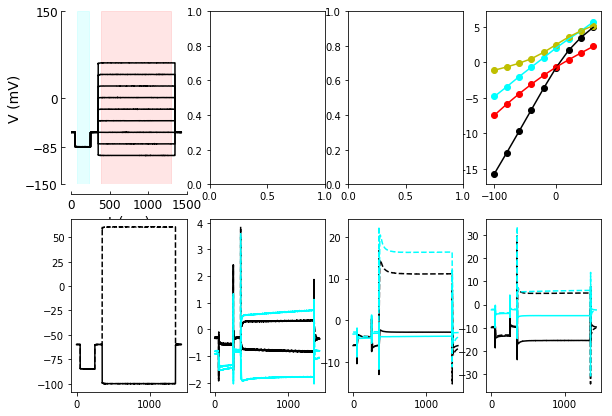

In [92]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes
fig = plt.figure(figsize=(9.5, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,4,1)
for m in range(0,9): #hard coded final number (change)
    plt.plot(Selmg419BeforeMEAN[m],'black' )#color = colorsSINGLES[0]
    
ax2 = plt.subplot(2,4,4) # MEC-4d
ax3 = plt.subplot(2,4,3) # UNC-8d
ax4 = plt.subplot(2,4,2) # DEGT-1d

ax5 = plt.subplot(2,4,5)
plt.plot(Selmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
plt.plot(Selmg419BeforeMEAN[8],'black',linestyle='--')


ax6 = plt.subplot(2,4,6)
plt.plot(CurSelmg418BeforeMEAN[0],'black')#color = colorsSINGLES[0]
plt.plot(CurSelmg418BeforeMEAN[8],'black',linestyle='--')

plt.plot(CurSelmg418PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
plt.plot(CurSelmg418PotassiumMEAN[8],  color = 'cyan',linestyle='--')

ax7 = plt.subplot(2,4,7)
plt.plot(CurSelpTL69BeforeMEAN[0],'black')#color = colorsSINGLES[0]
plt.plot(CurSelpTL69BeforeMEAN[8],'black',linestyle='--')

plt.plot(CurSelpTL69PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
plt.plot(CurSelpTL69PotassiumMEAN[8],  color = 'cyan',linestyle='--')


ax8 = plt.subplot(2,4,8)
plt.plot(CurSelmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
plt.plot(CurSelmg419BeforeMEAN[8],'black',linestyle='--')

plt.plot(CurSelmg419PotassiumMEAN[0], color = 'cyan')#color = colorsSINGLES[0]
plt.plot(CurSelmg419PotassiumMEAN[8], color = 'cyan',linestyle='--')

#plt.plot(CurSelmg419NMGMEAN[0], color = 'g')#color = colorsSINGLES[0]
#plt.plot(CurSelmg419NMGMEAN[8], color = 'g',linestyle='--')

CurSelmg419NMGMEAN

#######################
Voltages = []
Currents = []
CurrentspTL69 = []
Currentsmg418 = []
for volt in range(0,len(raw_data)):
    Voltages.append([raw_data[volt,5:14]]) #TODO: CHANGE
    Currents.append([raw_data[volt,14:23]])

for volt in range(0,len(raw_datapTL69)):
    CurrentspTL69.append([raw_datapTL69[volt,14:23]])  
    
for volt in range(0,len(raw_datamg418)):
    Currentsmg418.append([raw_datamg418[volt,14:23]])   
    
#change to mV and uA    
VoltagesInmV = np.multiply(1000,Voltages) #becomes a np.array with shape 7,1,9 
CurrentsInuA = np.multiply(1000000,Currents)
CurrentspTL69InuA = np.multiply(1000000,CurrentspTL69)
Currentsmg418InuA = np.multiply(1000000,Currentsmg418)
    
#reshape Array
VoltagesInmV = VoltagesInmV.reshape(VoltagesInmV.shape[0],VoltagesInmV.shape[2]) #reshape 7,1,9 
CurrentsInuA = CurrentsInuA.reshape(CurrentsInuA.shape[0],CurrentsInuA.shape[2])
CurrentspTL69InuA = CurrentspTL69InuA.reshape(CurrentspTL69InuA.shape[0],CurrentspTL69InuA.shape[2])
Currentsmg418InuA  = Currentsmg418InuA .reshape(Currentsmg418InuA.shape[0],Currentsmg418InuA.shape[2])
    
#for i in range(0,4):
  #  ax.plot(VoltagesInmV[i],CurrentsInuA[i])
  #  ax.scatter(VoltagesInmV[i],CurrentsInuA[i])    
#ax1.set_title('used to +60 in some \n how to include current response?',size=10) 
ax1.set_ylim([-150, 150])
ax1.set_xlim([0, 1500])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
#ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
ax1.set_yticks([-150,-85,0,150])
ax1.set_xticks([0,500, 1000, 1500])
ax1.set_xlabel('t (ms)',fontsize=14)
ax1.set_ylabel('V (mV)',fontsize=14)
ax1.axvspan(75, 225, color='cyan', alpha=0.1)
ax1.axvspan(390, 1300, color='red', alpha=0.1)
#ax1.set_title('Voltage Step protocol',size=14)
#ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
#ax1.set_xlabel('t (ms)',fontsize=14)

#ax1.spines['left'].set_visible(False) 
#ax1.yaxis.set_visible(False)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']


#Find Solutions used to plot (color code) different solutions in the same order
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],'black')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],color = 'black')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],'r')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]], color ='r')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],'cyan')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],'y')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]], color = 'y')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],'g')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]], color = 'g')          
# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
# No ticklabels at zero
ax2.set_ylim([-20,20])
ax2.set_xlim([-110,70])
ax2.set_xticks([-100,-50,50])
ax2.set_yticks([-20,-20,-10,10,20])
#ax2.xaxis.set_label_position("right")
ax2.set_xlabel('V (mV)',fontsize=14)
ax2.set_ylabel('I (µA)',fontsize=14)
ax2.xaxis.set_label_coords(0.85,0.39)
ax2.yaxis.set_label_coords(0.77,0.93)
ax2.tick_params(axis='both', which='major', labelsize=10)  
ax2.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)
# Hide the right and top spines
ax2.text(-30, 23, 'MEC-4d',color=colorM4)

ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],'black')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]], color = 'black')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],'r')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]], color = 'r')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],'cyan')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],'y')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]], color = 'y')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],'g')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69== 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]], color = 'g') 
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.set_ylim([-20,20])
ax3.set_xlim([-110,70])
ax3.set_xticks([-100,-50,50])
ax3.set_yticks([-20,-20,-10,10,20])
ax3.set_xlabel('V (mV)',fontsize=14)
ax3.set_ylabel('I (µA)',fontsize=14)
ax3.xaxis.set_label_coords(0.85,0.39)
ax3.yaxis.set_label_coords(0.77,0.93)
ax3.tick_params(axis='both', which='major', labelsize=10)  
ax3.text(-30, 23, 'UNC-8d',color=colorU8)

ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],'black')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]], color = 'black')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],'r')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]], color = 'r')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],'cyan')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],'y')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]], color = 'y')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],'g')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],color = 'g')      
# Hide the right and top spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.set_xlabel('V (mV)',fontsize=14)
ax4.set_ylabel('I (µA)',fontsize=14)
ax4.set_ylim([-2,2])
ax4.set_xlim([-110,70])
ax4.set_xticks([-100,-50,50])
ax4.set_yticks([-2,-2,-1,1,2])
ax4.xaxis.set_label_coords(0.85,0.39)
ax4.yaxis.set_label_coords(0.77,0.93)
ax4.tick_params(axis='both', which='major', labelsize=10)  
ax4.text(-30, 2.3, 'DEGT-1d',color=colorDT1)

#bbox_to_anchor=(left, down, right, up)
#ax4.legend(legendlabel,bbox_to_anchor=(0., 1.02, 1, .102))


ax5.set_ylim([-150, 150])
ax5.set_xlim([0, 1500])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
#ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
ax5.set_yticks([-150,-85,0,150])
ax5.set_xticks([0,500, 1000, 1500])
ax5.set_xlabel('t (ms)',fontsize=14)
ax5.set_ylabel('V (mV)',fontsize=14)
#ax5.axvspan(75, 225, color='cyan', alpha=0.1)
#ax5.axvspan(390, 1300, color='red', alpha=0.1)


#plt.gcf().subplots_adjust(bottom=0.3, left=0.25,hspace=0.75, wspace=0.1) 
plt.gcf().subplots_adjust(bottom=0.15, left=0.15,hspace=.3, wspace=0.3) 
#ax.legend(LegendsSolutions) #loc = 0 = best

#plt.savefig(filedir+"Fig2-IVcurvesPerm"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IVcurvesPerm"+'.pdf')
 

plt.show()

### CURRENT VERSION

IndexError: index -1 is out of bounds for axis 1 with size 0

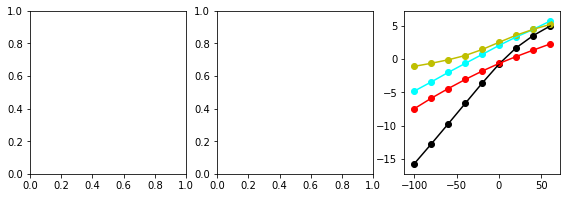

In [93]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes
fig = plt.figure(figsize=(9.5, 3)) 
#plt.subplots(2, 2, sharex='col')
# ax1 = plt.subplot(2,4,1)
# for m in range(0,9): #hard coded final number (change)
#     plt.plot(Selmg419BeforeMEAN[m],'black' )#color = colorsSINGLES[0]
    
ax2 = plt.subplot(1,3,3) # MEC-4d
ax3 = plt.subplot(1,3,2) # UNC-8d
ax4 = plt.subplot(1,3,1) # DEGT-1d

# ax5 = plt.subplot(2,4,5)
# plt.plot(Selmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(Selmg419BeforeMEAN[8],'black',linestyle='--')


# ax6 = plt.subplot(2,4,6)
# plt.plot(CurSelmg418BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelmg418BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelmg418PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelmg418PotassiumMEAN[8],  color = 'cyan',linestyle='--')

# ax7 = plt.subplot(2,4,7)
# plt.plot(CurSelpTL69BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelpTL69BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelpTL69PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelpTL69PotassiumMEAN[8],  color = 'cyan',linestyle='--')


# ax8 = plt.subplot(2,4,8)
# plt.plot(CurSelmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelmg419BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelmg419PotassiumMEAN[0], color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelmg419PotassiumMEAN[8], color = 'cyan',linestyle='--')

#plt.plot(CurSelmg419NMGMEAN[0], color = 'g')#color = colorsSINGLES[0]
#plt.plot(CurSelmg419NMGMEAN[8], color = 'g',linestyle='--')

CurSelmg419NMGMEAN

#######################
Voltages = []
Currents = []
CurrentspTL69 = []
Currentsmg418 = []
for volt in range(0,len(raw_data)):
    Voltages.append([raw_data[volt,5:14]]) #TODO: CHANGE
    Currents.append([raw_data[volt,14:23]])

for volt in range(0,len(raw_datapTL69)):
    CurrentspTL69.append([raw_datapTL69[volt,14:23]])  
    
for volt in range(0,len(raw_datamg418)):
    Currentsmg418.append([raw_datamg418[volt,14:23]])   
    
#change to mV and uA    
VoltagesInmV = np.multiply(1000,Voltages) #becomes a np.array with shape 7,1,9 
CurrentsInuA = np.multiply(1000000,Currents)
CurrentspTL69InuA = np.multiply(1000000,CurrentspTL69)
Currentsmg418InuA = np.multiply(1000000,Currentsmg418)
    
#reshape Array
VoltagesInmV = VoltagesInmV.reshape(VoltagesInmV.shape[0],VoltagesInmV.shape[2]) #reshape 7,1,9 
CurrentsInuA = CurrentsInuA.reshape(CurrentsInuA.shape[0],CurrentsInuA.shape[2])
CurrentspTL69InuA = CurrentspTL69InuA.reshape(CurrentspTL69InuA.shape[0],CurrentspTL69InuA.shape[2])
Currentsmg418InuA  = Currentsmg418InuA .reshape(Currentsmg418InuA.shape[0],Currentsmg418InuA.shape[2])
    
#for i in range(0,4):
  #  ax.plot(VoltagesInmV[i],CurrentsInuA[i])
  #  ax.scatter(VoltagesInmV[i],CurrentsInuA[i])    
#ax1.set_title('used to +60 in some \n how to include current response?',size=10) 
# ax1.set_ylim([-150, 150])
# ax1.set_xlim([0, 1500])
# ax1.spines['right'].set_visible(False)                                  # no spine at the right
# ax1.spines['top'].set_visible(False)                                     # no spine at the top
# ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax1.spines['bottom'].set_position(('outward',10))  
# ax1.spines['top'].set_position(('axes',5)) 
# ax1.get_yaxis().set_tick_params(direction='in')
# ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax1.tick_params(axis='both', which='major', labelsize=12)  
# #ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
# ax1.set_yticks([-150,-85,0,150])
# ax1.set_xticks([0,500, 1000, 1500])
# ax1.set_xlabel('t (ms)',fontsize=14)
# ax1.set_ylabel('V (mV)',fontsize=14)
# ax1.axvspan(75, 225, color='cyan', alpha=0.1)
# ax1.axvspan(390, 1300, color='red', alpha=0.1)


legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']


#Find Solutions used to plot (color code) different solutions in the same order
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],'black')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],color = 'black')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],'r')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]], color ='r')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],'cyan')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],'y')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]], color = 'y')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],'g')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]], color = 'g')          
# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
# No ticklabels at zero
ax2.set_ylim([-20,20])
ax2.set_xlim([-110,70])
ax2.set_xticks([-100,-50,50])
ax2.set_yticks([-20,-20,-10,10,20])
#ax2.xaxis.set_label_position("right")
ax2.set_xlabel('V (mV)',fontsize=14)
ax2.set_ylabel('I (µA)',fontsize=14)
ax2.xaxis.set_label_coords(0.85,0.39)
ax2.yaxis.set_label_coords(0.77,0.93)
ax2.tick_params(axis='both', which='major', labelsize=10)  
#ax2.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)
# Hide the right and top spines
ax2.text(-30, 23, 'MEC-4d',color=colorM4)

ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],'black')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]], color = 'black')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],'r')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]], color = 'r')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],'cyan')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],'y')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]], color = 'y')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],'g')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69== 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]], color = 'g') 
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.set_ylim([-20,20])
ax3.set_xlim([-110,70])
ax3.set_xticks([-100,-50,50])
ax3.set_yticks([-20,-20,-10,10,20])
ax3.set_xlabel('V (mV)',fontsize=14)
ax3.set_ylabel('I (µA)',fontsize=14)
ax3.xaxis.set_label_coords(0.85,0.39)
ax3.yaxis.set_label_coords(0.77,0.93)
ax3.tick_params(axis='both', which='major', labelsize=10)  
ax3.text(-30, 23, 'UNC-8d',color=colorU8)

ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],'black')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]], color = 'black')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],'r')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]], color = 'r')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],'cyan')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],'y')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]], color = 'y')      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],'g')
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],color = 'g')      
# Hide the right and top spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.set_xlabel('V (mV)',fontsize=14)
ax4.set_ylabel('I (µA)',fontsize=14)
ax4.set_ylim([-2,2])
ax4.set_xlim([-110,70])
ax4.set_xticks([-100,-50,50])
ax4.set_yticks([-2,-2,-1,1,2])
ax4.xaxis.set_label_coords(0.85,0.39)
ax4.yaxis.set_label_coords(0.77,0.93)
ax4.tick_params(axis='both', which='major', labelsize=10)  
ax4.text(-30, 2.3, 'DEGT-1d',color=colorDT1)
ax4.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)

#bbox_to_anchor=(left, down, right, up)
#ax4.legend(legendlabel,bbox_to_anchor=(0., 1.02, 1, .102))


# ax5.set_ylim([-150, 150])
# ax5.set_xlim([0, 1500])
# ax5.spines['right'].set_visible(False)                                  # no spine at the right
# ax5.spines['top'].set_visible(False)                                     # no spine at the top
# ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax5.spines['bottom'].set_position(('outward',10))  
# ax5.spines['top'].set_position(('axes',5)) 
# ax5.get_yaxis().set_tick_params(direction='in')
# ax5.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax5.tick_params(axis='both', which='major', labelsize=12)  
# #ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
# ax5.set_yticks([-150,-85,0,150])
# ax5.set_xticks([0,500, 1000, 1500])
# ax5.set_xlabel('t (ms)',fontsize=14)
# ax5.set_ylabel('V (mV)',fontsize=14)
# #ax5.axvspan(75, 225, color='cyan', alpha=0.1)
# #ax5.axvspan(390, 1300, color='red', alpha=0.1)


#plt.gcf().subplots_adjust(bottom=0.3, left=0.25,hspace=0.75, wspace=0.1) 
plt.gcf().subplots_adjust(bottom=0.15, left=0.15,hspace=.3, wspace=0.3) 
#ax.legend(LegendsSolutions) #loc = 0 = best

plt.savefig(filedir+"Fig2-IVcurvesPerm"+'.eps')
plt.savefig(filedirManuscript+"Fig2-IVcurvesPerm"+'.pdf')
 

plt.show()

# version talk and maybe adapt shades of red, purple, green

IndexError: index -1 is out of bounds for axis 1 with size 0

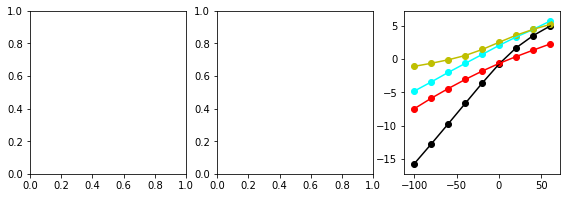

In [94]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes
fig = plt.figure(figsize=(9.5, 3)) 
#plt.subplots(2, 2, sharex='col')
# ax1 = plt.subplot(2,4,1)
# for m in range(0,9): #hard coded final number (change)
#     plt.plot(Selmg419BeforeMEAN[m],'black' )#color = colorsSINGLES[0]
    
ax2 = plt.subplot(1,3,3) # MEC-4d
ax3 = plt.subplot(1,3,2) # UNC-8d
ax4 = plt.subplot(1,3,1) # DEGT-1d

# ax5 = plt.subplot(2,4,5)
# plt.plot(Selmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(Selmg419BeforeMEAN[8],'black',linestyle='--')


# ax6 = plt.subplot(2,4,6)
# plt.plot(CurSelmg418BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelmg418BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelmg418PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelmg418PotassiumMEAN[8],  color = 'cyan',linestyle='--')

# ax7 = plt.subplot(2,4,7)
# plt.plot(CurSelpTL69BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelpTL69BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelpTL69PotassiumMEAN[0],  color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelpTL69PotassiumMEAN[8],  color = 'cyan',linestyle='--')


# ax8 = plt.subplot(2,4,8)
# plt.plot(CurSelmg419BeforeMEAN[0],'black')#color = colorsSINGLES[0]
# plt.plot(CurSelmg419BeforeMEAN[8],'black',linestyle='--')

# plt.plot(CurSelmg419PotassiumMEAN[0], color = 'cyan')#color = colorsSINGLES[0]
# plt.plot(CurSelmg419PotassiumMEAN[8], color = 'cyan',linestyle='--')

#plt.plot(CurSelmg419NMGMEAN[0], color = 'g')#color = colorsSINGLES[0]
#plt.plot(CurSelmg419NMGMEAN[8], color = 'g',linestyle='--')

CurSelmg419NMGMEAN

#######################
Voltages = []
Currents = []
CurrentspTL69 = []
Currentsmg418 = []
for volt in range(0,len(raw_data)):
    Voltages.append([raw_data[volt,5:14]]) #TODO: CHANGE
    Currents.append([raw_data[volt,14:23]])

for volt in range(0,len(raw_datapTL69)):
    CurrentspTL69.append([raw_datapTL69[volt,14:23]])  
    
for volt in range(0,len(raw_datamg418)):
    Currentsmg418.append([raw_datamg418[volt,14:23]])   
    
#change to mV and uA    
VoltagesInmV = np.multiply(1000,Voltages) #becomes a np.array with shape 7,1,9 
CurrentsInuA = np.multiply(1000000,Currents)
CurrentspTL69InuA = np.multiply(1000000,CurrentspTL69)
Currentsmg418InuA = np.multiply(1000000,Currentsmg418)
    
#reshape Array
VoltagesInmV = VoltagesInmV.reshape(VoltagesInmV.shape[0],VoltagesInmV.shape[2]) #reshape 7,1,9 
CurrentsInuA = CurrentsInuA.reshape(CurrentsInuA.shape[0],CurrentsInuA.shape[2])
CurrentspTL69InuA = CurrentspTL69InuA.reshape(CurrentspTL69InuA.shape[0],CurrentspTL69InuA.shape[2])
Currentsmg418InuA  = Currentsmg418InuA .reshape(Currentsmg418InuA.shape[0],Currentsmg418InuA.shape[2])
    
#for i in range(0,4):
  #  ax.plot(VoltagesInmV[i],CurrentsInuA[i])
  #  ax.scatter(VoltagesInmV[i],CurrentsInuA[i])    
#ax1.set_title('used to +60 in some \n how to include current response?',size=10) 
# ax1.set_ylim([-150, 150])
# ax1.set_xlim([0, 1500])
# ax1.spines['right'].set_visible(False)                                  # no spine at the right
# ax1.spines['top'].set_visible(False)                                     # no spine at the top
# ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax1.spines['bottom'].set_position(('outward',10))  
# ax1.spines['top'].set_position(('axes',5)) 
# ax1.get_yaxis().set_tick_params(direction='in')
# ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax1.tick_params(axis='both', which='major', labelsize=12)  
# #ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
# ax1.set_yticks([-150,-85,0,150])
# ax1.set_xticks([0,500, 1000, 1500])
# ax1.set_xlabel('t (ms)',fontsize=14)
# ax1.set_ylabel('V (mV)',fontsize=14)
# ax1.axvspan(75, 225, color='cyan', alpha=0.1)
# ax1.axvspan(390, 1300, color='red', alpha=0.1)


legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']


#Find Solutions used to plot (color code) different solutions in the same order
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],'black')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NaGluSel2'))[0,-1]],color = 'black')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],'r')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'LiGluSel'))[0,-1]], color ='r')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],'cyan')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],'y')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'CsGluSel'))[0,-1]], color = 'y')      
ax2.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],'g')
ax2.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]],CurrentsInuA[np.asarray(np.where(Solutionsmg419 == 'NmgGluSel'))[0,-1]], color = 'g')          
# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
# No ticklabels at zero
ax2.set_ylim([-20,20])
ax2.set_xlim([-110,70])
ax2.set_xticks([-100,-50,50])
ax2.set_yticks([-20,-20,-10,10,20])
#ax2.xaxis.set_label_position("right")
ax2.set_xlabel('V (mV)',fontsize=14)
ax2.set_ylabel('I (µA)',fontsize=14)
ax2.xaxis.set_label_coords(0.85,0.39)
ax2.yaxis.set_label_coords(0.77,0.93)
ax2.tick_params(axis='both', which='major', labelsize=10)  
#ax2.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)
# Hide the right and top spines
ax2.text(-30, 23, 'MEC-4d',color=colorM4)

ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],'black')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NaGluSel2'))[0,-1]], color = 'black')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],'r')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'LiGluSel'))[0,-1]], color = 'r')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],'cyan')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'KGluSel'))[0,-1]], color = 'cyan')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],'y')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'CsGluSel'))[0,-1]], color = 'y')      
ax3.plot(VoltagesInmV[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]],'g')
ax3.scatter(VoltagesInmV[np.asarray(np.where(SolutionspTL69== 'NmgGluSel'))[0,-1]],CurrentspTL69InuA[np.asarray(np.where(SolutionspTL69 == 'NmgGluSel'))[0,-1]], color = 'g') 
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.set_ylim([-20,20])
ax3.set_xlim([-110,70])
ax3.set_xticks([-100,-50,50])
ax3.set_yticks([-20,-20,-10,10,20])
ax3.set_xlabel('V (mV)',fontsize=14)
ax3.set_ylabel('I (µA)',fontsize=14)
ax3.xaxis.set_label_coords(0.85,0.39)
ax3.yaxis.set_label_coords(0.77,0.93)
ax3.tick_params(axis='both', which='major', labelsize=10)  
ax3.text(-30, 23, 'UNC-8d',color=colorU8)

ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],color=(0.2, 0,0))
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NaGluSel2'))[0,-1]], color=(0.2, 0,0))      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],color = (0.4, 0,0))
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'LiGluSel'))[0,-1]], color = (0.4, 0,0))      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],color = (0.6, 0,0))
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'KGluSel'))[0,-1]], color = (0.6, 0,0))      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],color = (0.8, 0,0))
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'CsGluSel'))[0,-1]], color =(0.8, 0,0))      
ax4.plot(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],color = (1, 0,0))
ax4.scatter(VoltagesInmV[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],Currentsmg418InuA[np.asarray(np.where(Solutionsmg418 == 'NmgGluSel'))[0,-1]],color = (1, 0,0))      
# Hide the right and top spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.set_xlabel('V (mV)',fontsize=14)
ax4.set_ylabel('I (µA)',fontsize=14)
ax4.set_ylim([-2,2])
ax4.set_xlim([-110,70])
ax4.set_xticks([-100,-50,50])
ax4.set_yticks([-2,-2,-1,1,2])
ax4.xaxis.set_label_coords(0.85,0.39)
ax4.yaxis.set_label_coords(0.77,0.93)
ax4.tick_params(axis='both', which='major', labelsize=10)  
ax4.text(-30, 2.3, 'DEGT-1d',color=colorDT1)
ax4.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)

#bbox_to_anchor=(left, down, right, up)
#ax4.legend(legendlabel,bbox_to_anchor=(0., 1.02, 1, .102))


# ax5.set_ylim([-150, 150])
# ax5.set_xlim([0, 1500])
# ax5.spines['right'].set_visible(False)                                  # no spine at the right
# ax5.spines['top'].set_visible(False)                                     # no spine at the top
# ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax5.spines['bottom'].set_position(('outward',10))  
# ax5.spines['top'].set_position(('axes',5)) 
# ax5.get_yaxis().set_tick_params(direction='in')
# ax5.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax5.tick_params(axis='both', which='major', labelsize=12)  
# #ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
# ax5.set_yticks([-150,-85,0,150])
# ax5.set_xticks([0,500, 1000, 1500])
# ax5.set_xlabel('t (ms)',fontsize=14)
# ax5.set_ylabel('V (mV)',fontsize=14)
# #ax5.axvspan(75, 225, color='cyan', alpha=0.1)
# #ax5.axvspan(390, 1300, color='red', alpha=0.1)


#plt.gcf().subplots_adjust(bottom=0.3, left=0.25,hspace=0.75, wspace=0.1) 
plt.gcf().subplots_adjust(bottom=0.15, left=0.15,hspace=.3, wspace=0.3) 
#ax.legend(LegendsSolutions) #loc = 0 = best

plt.savefig(filedir+"Fig2-IVcurvesPerm"+'.eps')
plt.savefig(filedirManuscript+"Fig2-IVcurvesPerm-DIFFCOLOR"+'.pdf')
 

plt.show()

In [95]:
colorDT1

(0.89, 0.11, 0.1)

In [96]:
result = np.where(LegendsSolutions == 'NmgGluSel')
#print(result)
type(result)
test = LegendsSolutions[result] 
type(test)
print(test)
result1 = list(result)

NameError: name 'LegendsSolutions' is not defined

In [97]:
result2 = np.asarray(result)
type(result2)
result2.shape

NameError: name 'result' is not defined

In [98]:
CurrentsInuA[result2[0,-1]]
#type(CurrentsInuA)



NameError: name 'result2' is not defined

In [99]:
#result = np.asarray(np.where(LegendsSolutions == 'NmgGluSel'))[0,-1]
#result2 = np.asarray(result)
CurrentsInuA[np.asarray(np.where(LegendsSolutions == 'NmgGluSel'))[0,-1]]



NameError: name 'LegendsSolutions' is not defined

In [100]:
M4label = ['Na', 'Li', 'K', 'Cs', 'NMG']

In [101]:
print(result)

NameError: name 'result' is not defined